# 09 - Introduction to deep learning for computer vision

## import libraries

In [1]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammett","key":"2e7314e23178759f782023fa886c1f3e"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

 98% 794M/812M [00:04<00:00, 186MB/s]
100% 812M/812M [00:06<00:00, 141MB/s]


In [3]:
!unzip -qq /content/dogs-vs-cats.zip
!unzip -qq /content/train.zip

##  Introduction to convnets

In [4]:
# Instantiating a small convnet

input = keras.Input(shape = (28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
output = layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs = input, outputs = output)

In [5]:
# Displaying the model’s summary

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
# Training the convnet on MNIST images

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((len(train_images), 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((len(test_images), 28, 28, 1))
test_images = test_images.astype('float32') / 255

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model_history = model.fit(x=train_images,
                            y=train_labels,
                            epochs=5,
                            batch_size=128)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 8s 7ms/step - loss: 0.2430 - accuracy: 0.9286
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0573 - accuracy: 0.9827
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0397 - accuracy: 0.9875
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0251 - accuracy: 0.9920


In [ ]:
test_loss, test_acc = model_history.model.evaluate(x=test_images, y=test_labels)
print(f'Test accuracy : {test_acc:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9908
Test accuracy : 0.991


## Training a convnet from scratch on a small dataset

In [7]:
# Copying images to training, validation, and test directories

import os, shutil, pathlib
original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg"
            for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [11]:
#  Instantiating a small convnet for dogs vs. cats classification

input = keras.Input(shape=(180,180,3))
x = layers.Rescaling(scale=(1./255))(input)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs = input, outputs = output)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [12]:
# Configuring the model for training

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# Using image_dataset_from_directory to read images
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
#  Displaying the shapes of the data and labels yielded by the Dataset

for data_batch, labels_batch in train_dataset:
    print("data batch size: ", data_batch.shape)
    print("labels batch size: ", labels_batch.shape)
    break

data batch size:  (32, 180, 180, 3)
labels batch size:  (32,)


In [ ]:
# Fitting the model using a Dataset

callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",
                                             save_best_only=True,
                                             monitor='val_loss')]

history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 95ms/step - loss: 0.6999 - accuracy: 0.5120 - val_loss: 0.6925 - val_accuracy: 0.5680
Epoch 2/30
63/63 [==============================] - 4s 58ms/step - loss: 0.7175 - accuracy: 0.5630 - val_loss: 0.7090 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 4s 59ms/step - loss: 0.6770 - accuracy: 0.5925 - val_loss: 0.6825 - val_accuracy: 0.5800
Epoch 4/30
63/63 [==============================] - 6s 93ms/step - loss: 0.6566 - accuracy: 0.6445 - val_loss: 0.6525 - val_accuracy: 0.6200
Epoch 5/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6028 - accuracy: 0.6875 - val_loss: 0.5723 - val_accuracy: 0.7110
Epoch 6/30
63/63 [==============================] - 4s 59ms/step - loss: 0.5738 - accuracy: 0.7100 - val_loss: 0.6388 - val_accuracy: 0.6490
Epoch 7/30
63/63 [==============================] - 4s 66ms/step - loss: 0.5433 - accuracy: 0.7190 - val_loss: 0.6168 - val_accuracy: 0.6460
Epoch 8/30
63

<Figure size 640x480 with 0 Axes>

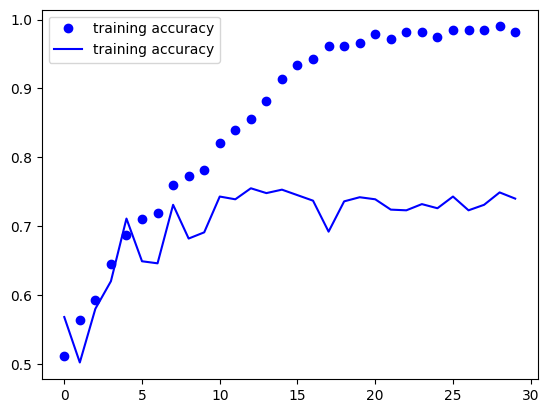

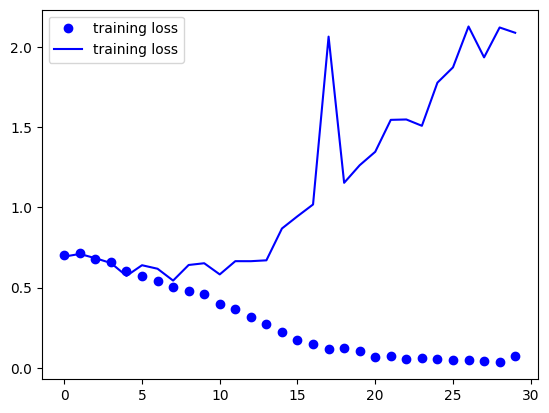

<Figure size 640x480 with 0 Axes>

In [ ]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['accuracy'], "bo", label = 'training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], "b", label = 'training accuracy')
plt.legend()
plt.figure()

plt.plot(history.epoch, history.history['loss'], "bo", label = 'training loss')
plt.plot(history.epoch, history.history['val_loss'], "b", label = 'training loss')
plt.legend()
plt.figure()


In [ ]:
#  Evaluating the model on the test set
test_model = keras.models.load_model(filepath='/content/convnet_from_scratch.keras')

test_loss, test_acc = test_model.evaluate(test_dataset)
print('Test accuracy: ', test_acc)

63/63 [==============================] - 2s 31ms/step - loss: 0.5456 - accuracy: 0.7155
Test accuracy:  0.715499997138977


In [ ]:
# Define a data augmentation stage to add to an image model

data_augmentation = keras.Sequential([
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])


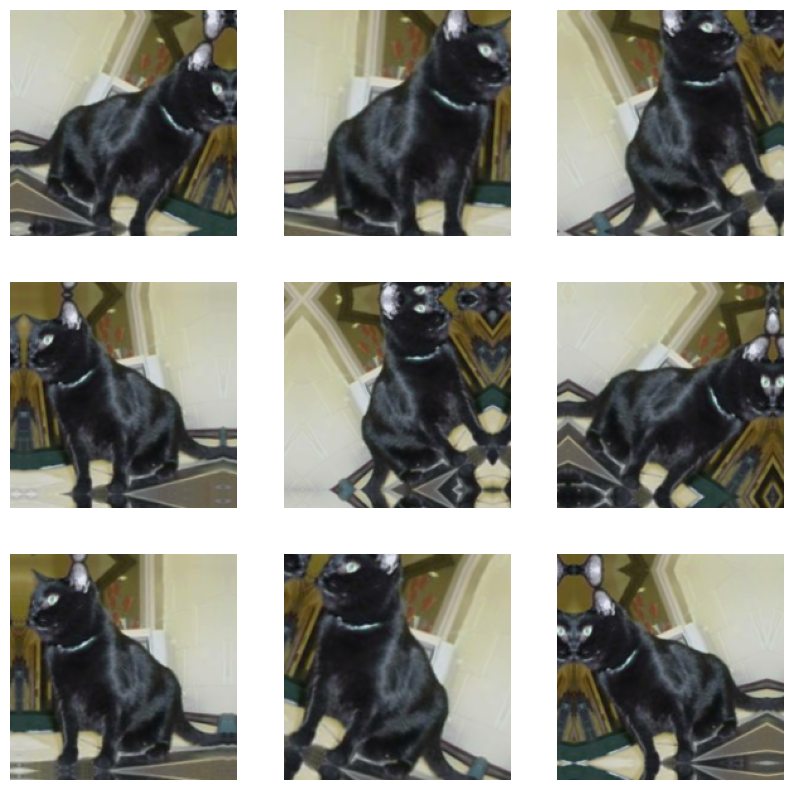

In [ ]:
# Displaying some randomly augmented training images

plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# Defining a new convnet that includes image augmentation and dropout

inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(scale=(1./255))(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation ='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation ='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

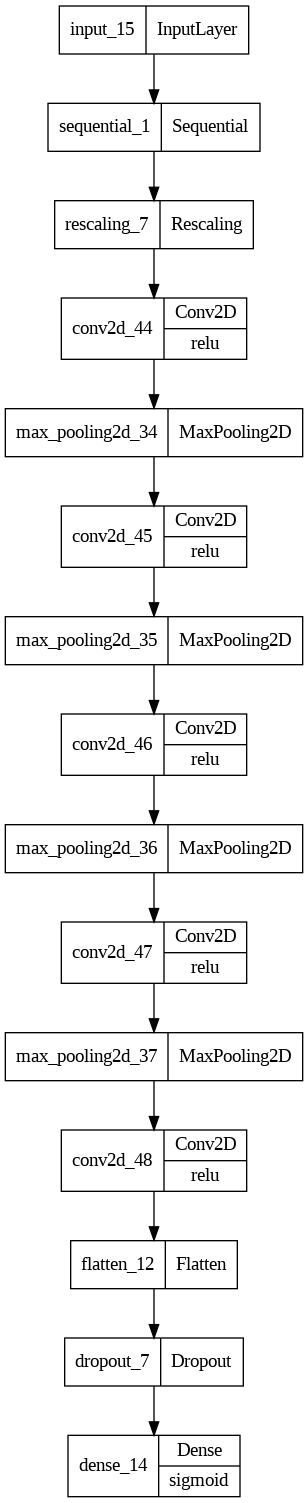

In [ ]:
keras.utils.plot_model(model = model, show_layer_activations=1)

In [ ]:
# Training the regularized convnet

callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_with_augmentation.keras",
                                             monitor='val_loss',
                                             save_best_only=True,
                                             )]

model_history = model.fit(train_dataset,
                          epochs=100,
                          callbacks=callbacks,
                          validation_data=validation_dataset
                          )

Epoch 1/100
63/63 [==============================] - 6s 64ms/step - loss: 0.7032 - accuracy: 0.5075 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6895 - accuracy: 0.5520 - val_loss: 0.7125 - val_accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 8s 114ms/step - loss: 0.6803 - accuracy: 0.5730 - val_loss: 0.6646 - val_accuracy: 0.6300
Epoch 4/100
63/63 [==============================] - 4s 59ms/step - loss: 0.6509 - accuracy: 0.6240 - val_loss: 0.7269 - val_accuracy: 0.5190
Epoch 5/100
63/63 [==============================] - 5s 84ms/step - loss: 0.6191 - accuracy: 0.6555 - val_loss: 0.7159 - val_accuracy: 0.5860
Epoch 6/100
63/63 [==============================] - 5s 79ms/step - loss: 0.6191 - accuracy: 0.6570 - val_loss: 1.6574 - val_accuracy: 0.4940
Epoch 7/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6168 - accuracy: 0.6675 - val_loss: 0.6013 - val_accuracy: 0.6820
Epoch

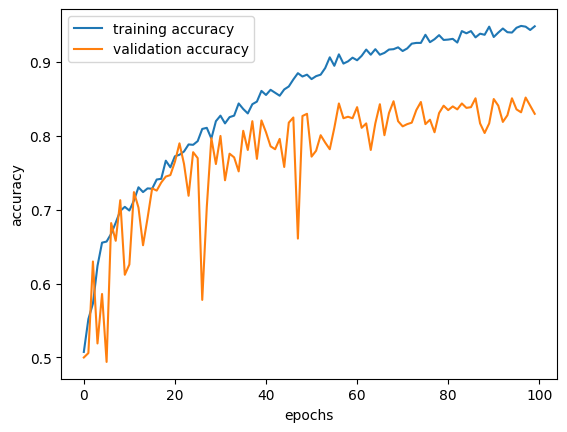

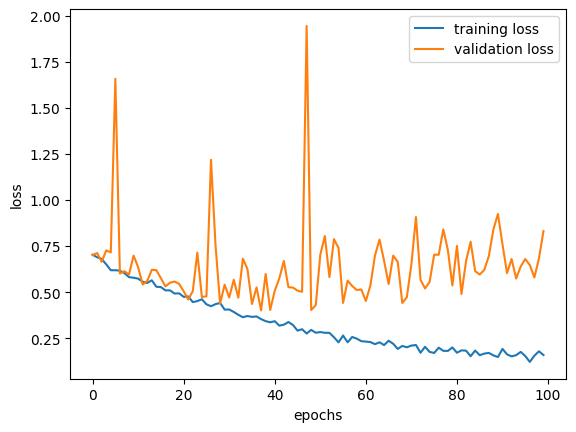

In [ ]:
plt.plot(model_history.epoch, model_history.history['accuracy'], label='training accuracy')
plt.plot(model_history.epoch, model_history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()
plt.plot(model_history.epoch, model_history.history['loss'], label='training loss')
plt.plot(model_history.epoch, model_history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy: ', test_acc)

63/63 [==============================] - 4s 61ms/step - loss: 0.9636 - accuracy: 0.8200
Test accuracy:  0.8199999928474426


## Leveraging a pretrained model

### Feature extraction with a pretrained model

In [ ]:
# Instantiating the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    input_shape=(180,180,3),
    include_top=False)

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
#  Extracting the VGG16 features and corresponding labels
import numpy as np

def get_feutures_and_labels(dataset):
    all_features = []
    all_labels = []

    for images, labels in dataset:
        processed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(processed_images, verbose = 0)
        all_features.append(features)
        all_labels.append(labels)

    return np.concatenate(all_features), np.concatenate(all_labels)


train_features, train_labels = get_feutures_and_labels(train_dataset)
validation_features, validation_labels = get_feutures_and_labels(validation_dataset)
test_features, test_labels = get_feutures_and_labels(test_dataset)


In [ ]:
 train_features.shape

(2000, 5, 5, 512)

In [ ]:
# Defining and training the densely connected classifier

inputs = layers.Input(shape = (5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(units=256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [keras.callbacks.ModelCheckpoint(filepath="feature_extraction.keras",
                                             monitor='val_loss',
                                             save_best_only=True,)]

model_history = model.fit(x = train_features,
                          y = train_labels,
                          epochs = 30,
                          callbacks=callbacks,
                          validation_data = (validation_features, validation_labels)
                          )


Epoch 1/30
63/63 [==============================] - 2s 15ms/step - loss: 16.7895 - accuracy: 0.9220 - val_loss: 4.1777 - val_accuracy: 0.9690
Epoch 2/30
63/63 [==============================] - 0s 6ms/step - loss: 4.4067 - accuracy: 0.9720 - val_loss: 5.2409 - val_accuracy: 0.9680
Epoch 3/30
63/63 [==============================] - 0s 7ms/step - loss: 1.6525 - accuracy: 0.9865 - val_loss: 3.9789 - val_accuracy: 0.9720
Epoch 4/30
63/63 [==============================] - 0s 6ms/step - loss: 1.1898 - accuracy: 0.9890 - val_loss: 5.9794 - val_accuracy: 0.9730
Epoch 5/30
63/63 [==============================] - 0s 5ms/step - loss: 1.1635 - accuracy: 0.9915 - val_loss: 5.9602 - val_accuracy: 0.9760
Epoch 6/30
63/63 [==============================] - 0s 5ms/step - loss: 0.3257 - accuracy: 0.9955 - val_loss: 11.9001 - val_accuracy: 0.9540
Epoch 7/30
63/63 [==============================] - 0s 6ms/step - loss: 0.7396 - accuracy: 0.9950 - val_loss: 4.5469 - val_accuracy: 0.9800
Epoch 8/30
63/63 

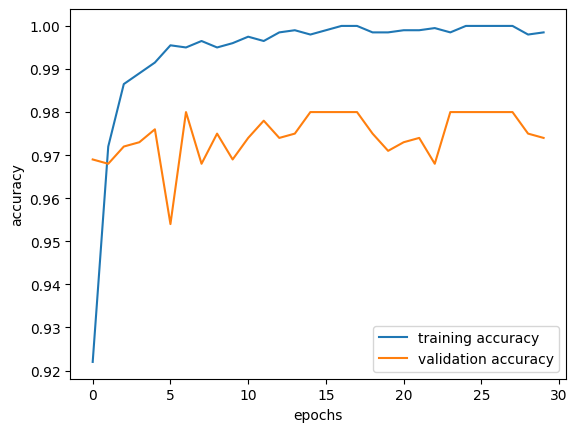

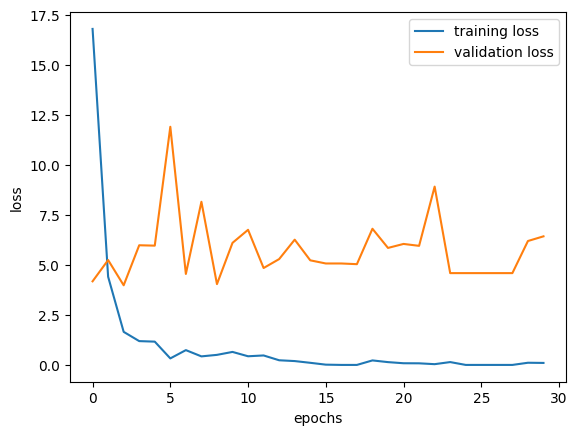

In [ ]:
plt.plot(model_history.epoch, model_history.history['accuracy'], label = 'training accuracy')
plt.plot(model_history.epoch, model_history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()
plt.plot(model_history.epoch, model_history.history['loss'], label = 'training loss')
plt.plot(model_history.epoch, model_history.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [ ]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('Test accuracy: ', test_acc)

63/63 [==============================] - 0s 4ms/step - loss: 7.6958 - accuracy: 0.9720
Test accuracy:  0.972000002861023


### Feature extraction together with data augmentation

In [17]:
# Instantiating and freezing the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                           include_top=False)
conv_base.trainable = False

# Printing the list of trainable weights before and after freezing
conv_base.trainable = True
print("This is the number of trainable weights before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights before freezing the conv base: 0


In [20]:
# Adding a data augmentation stage and a classifier to the convolutional base

data_augmentation = keras.Sequential([
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ])

inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(units=1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    monitor='val_loss',
    save_best_only = True
)]

model_history = model.fit(train_dataset,
                          epochs = 50,
                          validation_data = validation_dataset,
                          callbacks = callbacks)

Epoch 1/50
63/63 [==============================] - 16s 163ms/step - loss: 18.9551 - accuracy: 0.8935 - val_loss: 7.6785 - val_accuracy: 0.9560
Epoch 2/50
63/63 [==============================] - 10s 156ms/step - loss: 7.0380 - accuracy: 0.9485 - val_loss: 6.9458 - val_accuracy: 0.9560
Epoch 3/50
63/63 [==============================] - 10s 152ms/step - loss: 6.4029 - accuracy: 0.9575 - val_loss: 1.9608 - val_accuracy: 0.9810
Epoch 4/50
63/63 [==============================] - 10s 147ms/step - loss: 5.0595 - accuracy: 0.9610 - val_loss: 3.0944 - val_accuracy: 0.9730
Epoch 5/50
63/63 [==============================] - 10s 160ms/step - loss: 5.0667 - accuracy: 0.9575 - val_loss: 5.5520 - val_accuracy: 0.9700
Epoch 6/50
63/63 [==============================] - 12s 180ms/step - loss: 4.3330 - accuracy: 0.9660 - val_loss: 2.2448 - val_accuracy: 0.9830
Epoch 7/50
63/63 [==============================] - 11s 177ms/step - loss: 3.8549 - accuracy: 0.9710 - val_loss: 2.9757 - val_accuracy: 0.980

In [23]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy: ', test_acc)

63/63 [==============================] - 7s 99ms/step - loss: 2.5903 - accuracy: 0.9760
Test accuracy:  0.9760000109672546


## Fine-tuning a pretrained model

In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [26]:
# Freezing all layers until the fourth from the last
conv_base.trainable = True
for layers in conv_base.layers[:-4]:
  conv_base.trainable = False

In [30]:
# Fine-tuning the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [keras.callbacks.ModelCheckpoint(filepath="fine_tuning.keras",
                                             save_best_only=True,
                                             monitor='val_loss')]

model_history = model.fit(train_dataset,
                          epochs=30,
                          validation_data = validation_dataset,
                          callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 148ms/step - loss: 0.7700 - accuracy: 0.9845 - val_loss: 3.8427 - val_accuracy: 0.9740
Epoch 2/30
63/63 [==============================] - 12s 179ms/step - loss: 0.2225 - accuracy: 0.9920 - val_loss: 1.8449 - val_accuracy: 0.9830
Epoch 3/30
63/63 [==============================] - 13s 197ms/step - loss: 0.2806 - accuracy: 0.9930 - val_loss: 2.8383 - val_accuracy: 0.9730
Epoch 4/30
63/63 [==============================] - 12s 184ms/step - loss: 0.5373 - accuracy: 0.9885 - val_loss: 1.8533 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 12s 184ms/step - loss: 0.4797 - accuracy: 0.9900 - val_loss: 2.2694 - val_accuracy: 0.9820
Epoch 6/30
63/63 [==============================] - 10s 150ms/step - loss: 0.3513 - accuracy: 0.9905 - val_loss: 1.9102 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 13s 208ms/step - loss: 0.3786 - accuracy: 0.9915 - val_loss: 1.6101 - val_accuracy: 0.9840

In [33]:
model = keras.models.load_model('/content/fine_tuning.keras', safe_mode=False)
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy: ', test_acc)

63/63 [==============================] - 6s 90ms/step - loss: 2.2346 - accuracy: 0.9765
Test accuracy:  0.9764999747276306
